# Using Logistic Regression to Predict Loan Approval
### DS-160 - Final Project
### Eli Dalton

## Importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [36]:
dataset=pd.read_csv("loan-data.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Dealing with missing data

In [38]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
gender_mode=dataset['Gender'].mode().iloc[0]
dataset['Gender'].fillna(gender_mode, inplace=True)

In [40]:
married_mode=dataset['Married'].mode().iloc[0]
dataset['Married'].fillna(married_mode, inplace=True)

In [41]:
dependents_mode=dataset['Dependents'].mode().iloc[0]
dataset['Dependents'].fillna(dependents_mode, inplace=True)

In [42]:
self_emp_mode=dataset['Self_Employed'].mode().iloc[0]
dataset['Self_Employed'].fillna(self_emp_mode, inplace=True)

Because the dataset is skewed we will use median


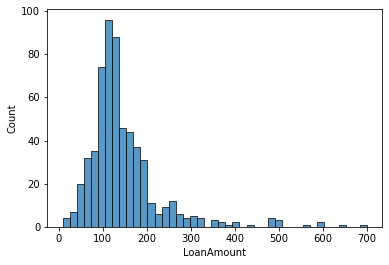

In [43]:
sns.histplot(dataset['LoanAmount'])
print('Because the dataset is skewed we will use median')

In [44]:
loanamt_median=dataset['LoanAmount'].median()
dataset['LoanAmount'].fillna(loanamt_median, inplace=True)

Because the dataset is skewed we will use median


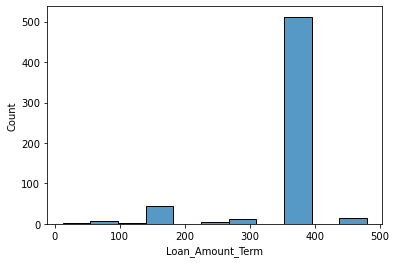

In [45]:
sns.histplot(dataset['Loan_Amount_Term'])
print('Because the dataset is skewed we will use median')

In [46]:
loanamt_term_median=dataset['Loan_Amount_Term'].median()
dataset['Loan_Amount_Term'].fillna(loanamt_term_median, inplace=True)

Because the dataset is skewed we will use median


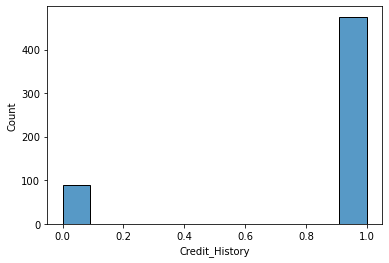

In [47]:
sns.histplot(dataset['Credit_History'])
print('Because the dataset is skewed we will use median')

In [48]:
credit_hist_median=dataset['Credit_History'].median()
dataset['Credit_History'].fillna(credit_hist_median, inplace=True)

dataset.isnull().sum()

## Deleting Unneeded columns

In [52]:
dataset.drop('Loan_ID', axis=1, inplace=True)

## Split the data into dependent and independent variables

In [53]:
dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
X=dataset[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=dataset[['Loan_Status']]

## Dealing with Categorical  Variables

In [55]:
X = pd.get_dummies(dataset[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']],
              drop_first=True)
X.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


- Gender_Female = 0
- Gender_Male = 1
- Married_Yes = 0
- Married_No = 1
- Dependents_0 = 000
- Dependents_1 = 100
- Dependents_2 = 010
- Dependents_3+ = 001
- Education_Not graduated = 0
- Education_graduated = 1
- Self_Employed_yes = 0
- Self_Employed_no = 1
- Property_Area_Rural = 00
- Property_Area_Semiurban = 10
- Property_Area_Urban = 01

## Splitting the dataset into the Training set and Test set

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                             test_size=.30,
                                             random_state=45)

## Training the Logistic Regression model 

In [74]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Creating a Confusion Matrix and Summary

In [75]:
y_pred=classifier.predict(X_test.values)

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  4  57]
 [  3 121]]


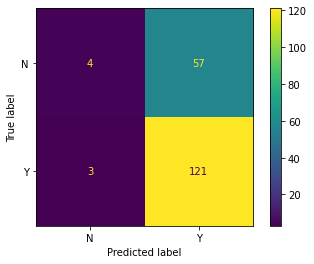

In [77]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.57      0.07      0.12        61
           Y       0.68      0.98      0.80       124

    accuracy                           0.68       185
   macro avg       0.63      0.52      0.46       185
weighted avg       0.64      0.68      0.58       185



## Results

### My Results
- True Negative (Loan not granted and predicted not to be granted)    4
- True Positive (Loan granted and predicted to be granted)          121
- False Positive (Loan granted but predicted not to be granted)      57
- False Negative (Loan not granted but predicted to be granted)       3